# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [78]:
#DIEGO ANTONIO NAVARRO RAMIREZ - A01645389

# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn.cluster import KMeans # For clustering
from sklearn.datasets import load_iris # For loading the iris dataset

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [2]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [3]:
# Print dataset

dataset



,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Print dataset shape
dataset.shape


(150, 5)

In [5]:
# Print column names
print(dataset.columns)


Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')


2. Drop rows with any missing values


In [6]:
# Drop na
dataset.dropna()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


3. Encoding the class label categorical column: from string to num


In [7]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
newdataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}})

#Visualize the dataset
newdataset

C:\Users\diego\AppData\Local\Temp\ipykernel_20088\1130153536.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newdataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}})


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [8]:
# Drop out non necesary columns



5. Scatter plot of the data

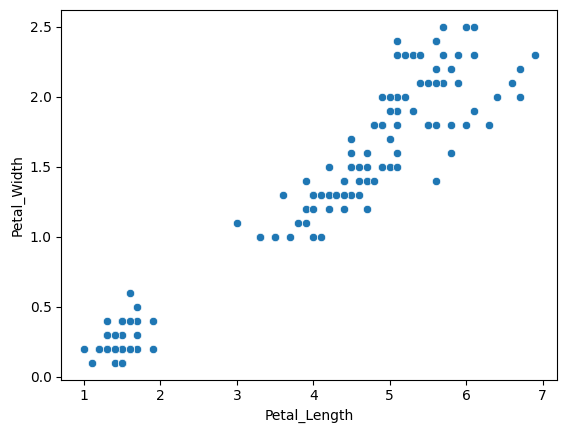

In [9]:
# Scatter plot of Petal_Length vs Petal_Width
sns.scatterplot(x = "Petal_Length", y = "Petal_Width", data = dataset)
plt.show()


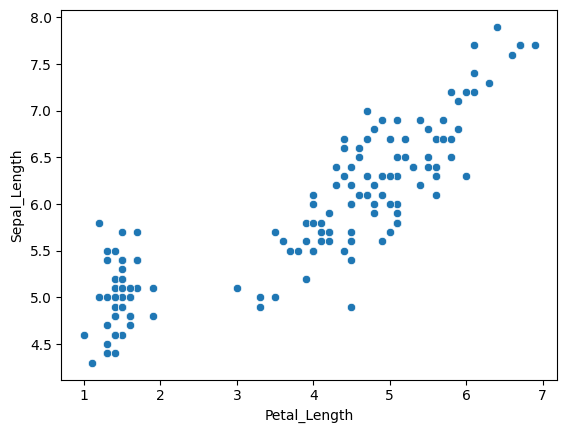

In [10]:
# Scatter plot of Petal_Length vs Sepal_Length
sns.scatterplot(x= "Petal_Length", y = "Sepal_Length", data = dataset)
plt.show()



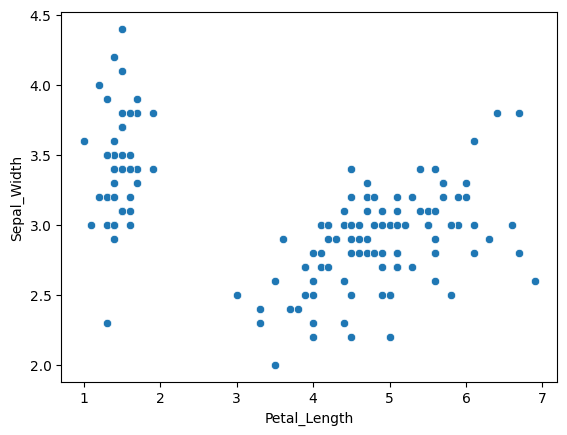

In [11]:
# Scatter plot of Petal_Length vs Sepal_Width
sns.scatterplot(x= "Petal_Length", y = "Sepal_Width", data = dataset)
plt.show()



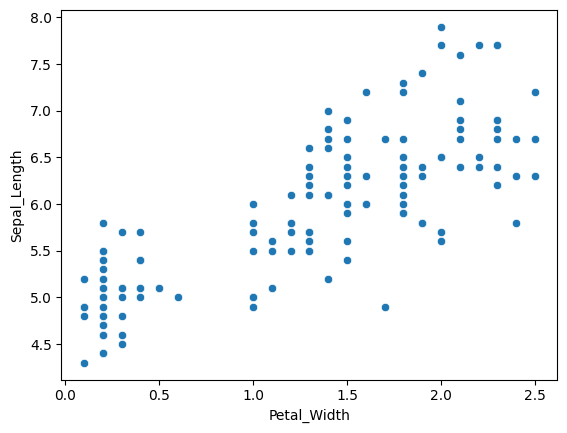

In [12]:
# Scatter plot of Petal_Width vs Sepal_Length
sns.scatterplot(x= "Petal_Width", y = "Sepal_Length", data = dataset)
plt.show()



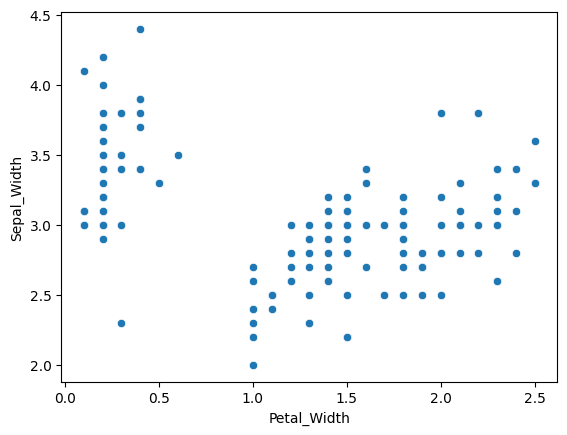

In [13]:
# Scatter plot of Petal_Width vs Sepal_Width
sns.scatterplot(x= "Petal_Width", y = "Sepal_Width", data = dataset)
plt.show()


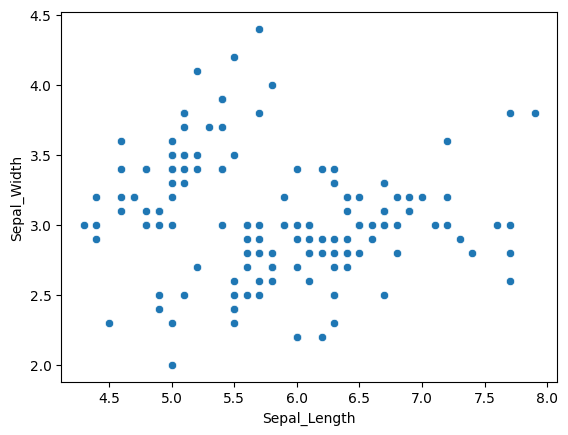

In [14]:
# Scatter plot of Sepal_Length vs Sepal_Width
sns.scatterplot(x= "Sepal_Length", y = "Sepal_Width", data = dataset)
plt.show()



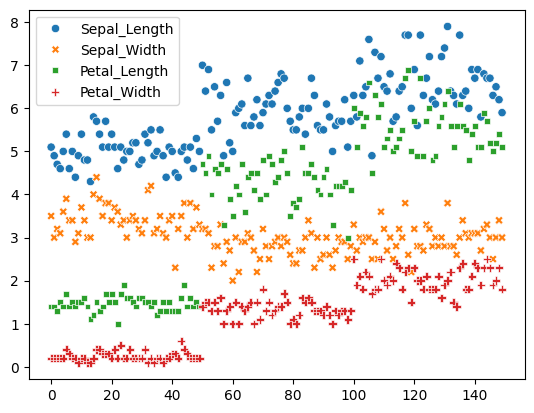

In [15]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.scatterplot(dataset)
plt.show()



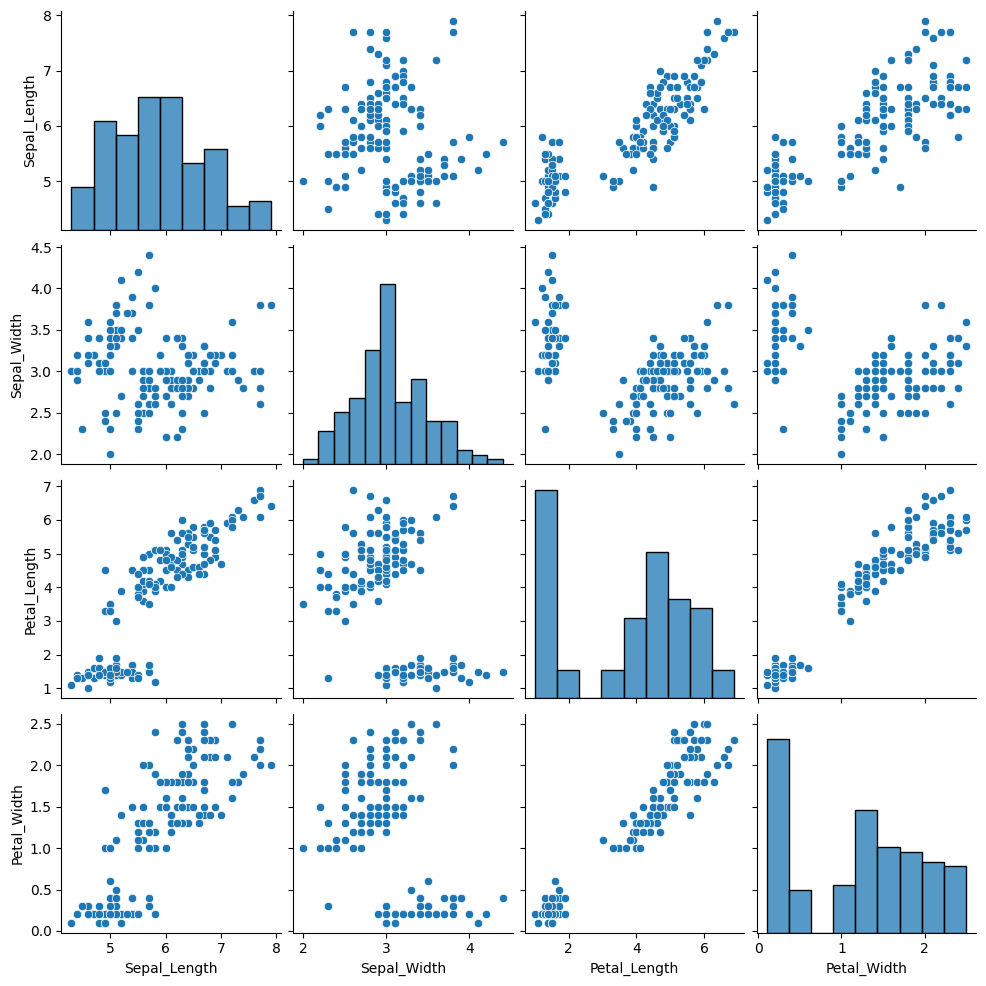

In [16]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(dataset)
plt.show()



6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [86]:
# Get dataframes for each real cluster
df1 = dataset[dataset["Flower"] == "Iris-setosa"]
df2 = dataset[dataset["Flower"] == "Iris-versicolor"]
df3 = dataset[dataset["Flower"] == "Iris-virginica"]


<Axes: xlabel='Petal_Length', ylabel='Petal_Width'>

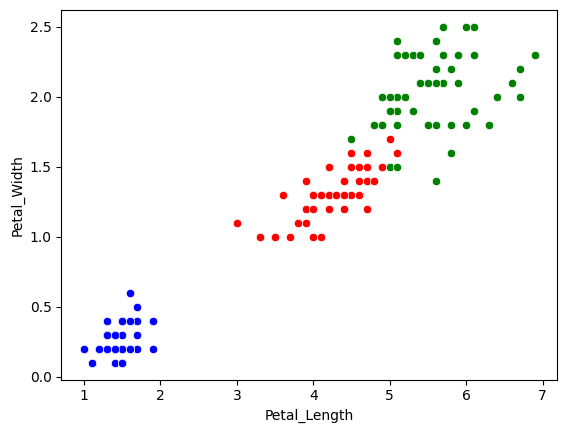

In [87]:
# Scatter plot of each real cluster for Petal
sns.scatterplot(data=df1, x="Petal_Length", y="Petal_Width", color="blue")
sns.scatterplot(data=df2, x="Petal_Length", y="Petal_Width", color="red")
sns.scatterplot(data=df3, x="Petal_Length", y="Petal_Width", color="green")


<Axes: xlabel='Sepal_Length', ylabel='Sepal_Width'>

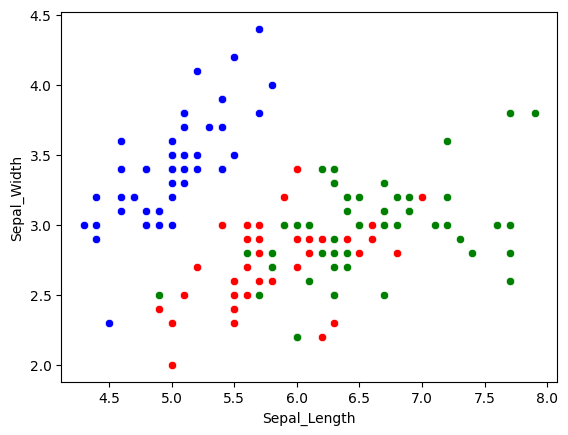

In [88]:
# Scatter plot of each real cluster for Sepal
sns.scatterplot(data=df1, x="Sepal_Length", y="Sepal_Width", color="blue")
sns.scatterplot(data=df2, x="Sepal_Length", y="Sepal_Width", color="red")
sns.scatterplot(data=df3, x="Sepal_Length", y="Sepal_Width", color="green")


Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [18]:
# Select variables (one, two, three, four)
X  = newdataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = newdataset["Flower"].values


In [19]:
# Understand the data y
print("Tipo de datos:", type(y))
print("Forma del array:", y.shape)
print("Cantidad de valores unicos:", len(np.unique(y)))
print("Cantidad de valores nulos:", len(y[ y == None ]))


Tipo de datos: <class 'numpy.ndarray'>
Forma del array: (150,)
Cantidad de valores unicos: 3
Cantidad de valores nulos: 0


In [20]:
# Calculate the number of observations in the dataset
print("Numero de observaciones en el dataset:", len(X))


Numero de observaciones en el dataset: 150


In [21]:
# Calculate the number of observations for class 0
print("Numero de observaciones para la clase 0:", len(y[y == 0]))


Numero de observaciones para la clase 0: 50


In [22]:
# Calculate the number of observations for class 1
print("Numero de observaciones para la clase 1:", len(y[y == 1]))

Numero de observaciones para la clase 1: 50


In [23]:
# Calculate the number of observations for class 2
print("Numero de observaciones para la clase 2:", len(y[y == 2]))

Numero de observaciones para la clase 2: 50


# Train a classifier

## Train the classification model

In [24]:
# Import sklearn linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import sklearn as sk

# Initialize the classifier
classifier = LogisticRegression()

# Fit the model to the training data
classifier.fit(X, y)

# Accuracy of the model
acc = classifier.score(X, y)
print("Porcentaje de precision:", acc * 100 , "%")



Porcentaje de precision: 97.33333333333334 %


## Predict the class of a new observation

In [25]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew


array([[5.5, 3.5, 1.5, 0.5]])

In [26]:
# Make the prediction using xnew
ypred = classifier.predict(xnew)
print("La flor es clase" , ypred)

# Get the predicted class



La flor es clase [0]


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [27]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split

# Split data in train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)


In [28]:
# Number of observations in the train set
print("Observaciones en el train set:", len(x_train))


Observaciones en el train set: 45


In [29]:
# Number of observations of each class in the train set
print("Observaciones clase 0 en el train set:", len(y_train[y_train == 0]))
print("Observaciones clase 1 en el train set:", len(y_train[y_train == 1]))
print("Observaciones clase 2 en el train set:", len(y_train[y_train == 2]))



Observaciones clase 0 en el train set: 17
Observaciones clase 1 en el train set: 16
Observaciones clase 2 en el train set: 12


In [30]:
# Number of observations in the test set
print("Observaciones en el test set:", len(x_test))


Observaciones en el test set: 105


In [31]:
# Number of observations of each class in the test set
print("Observaciones clase 0 en el test set:", len(y_test[y_test == 0]))
print("Observaciones clase 1 en el test set:", len(y_test[y_test == 1]))
print("Observaciones clase 2 en el test set:", len(y_test[y_test == 2]))


Observaciones clase 0 en el test set: 33
Observaciones clase 1 en el test set: 34
Observaciones clase 2 en el test set: 38


## Train the classification model

In [32]:
# Initialize the classifier
classifier

# Fit the model to the training data
classifier.fit(x_train, y_train)


LogisticRegression()

## Test the classification model

In [33]:
# Make the predictions using the test set
y_pred = classifier.predict(x_test)


In [34]:
# Explore real and predicted labels
print("Real:", y_test)
print("Pred:", classifier.predict(x_test))


Real: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2]
Pred: [2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 1 1 1 1 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 1 2 0 0 2 0 0 0 1 2 2]


## Compute the acurracy

In [35]:
# Define a function to compute accuracy
def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])



In [36]:
# Calculate total accuracy
print("Porcentaje de precision:", accuracy(y_test, y_pred) * 100 ,"%")


Porcentaje de precision: 90.47619047619048 %


In [37]:
# Calculate total accuracy using sklearn.metrics
from sklearn.metrics import accuracy_score
print("Porcentaje de precision:", accuracy_score(y_test, y_pred) * 100 ,"%")


Porcentaje de precision: 90.47619047619048 %


In [182]:
# Compute accuracy for class 0
indx0= y_test == 0
print("Porcentaje de precision clase 0:", accuracy_score(y_test[indx0], y_pred[indx0]) * 100 ,"%")


Porcentaje de precision clase 0: 100.0 %


In [184]:
# Compute accuracy for class 1
indx1= y_test == 1
print("Porcentaje de precision clase 1:", accuracy_score(y_test[indx1], y_pred[indx1]) * 100 ,"%")

Porcentaje de precision clase 1: 100.0 %


In [190]:
# Compute accuracy for class 2
indx2= y_test == 2
print("Porcentaje de precision clase 2:", accuracy_score(y_test[indx2], y_pred[indx2]) * 100 ,"%")


Porcentaje de precision clase 2: 73.68421052631578 %


## Confussion matrix

In [187]:
# Compute confussion matrix (normalized confusion matrix)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
print("Confussion Matrix =\n" , cm)
print("Confussion Matrix Normalized =\n" , cm_norm)


Confussion Matrix =
 [[33  0  0]
 [ 0 34  0]
 [ 0 10 28]]
Confussion Matrix Normalized =
 [[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.26315789 0.73684211]]


<Axes: >

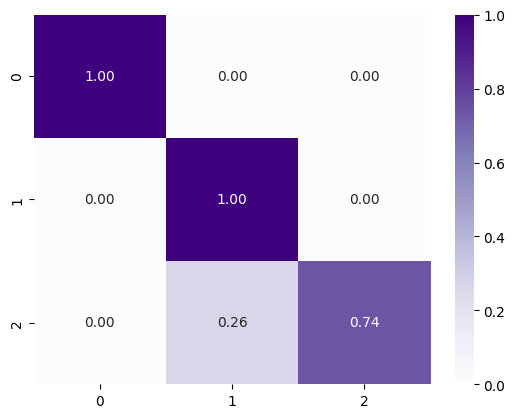

In [197]:
# Plot normalized confussion matrix
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Purples")


# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?


2) Using the four variables, try with two classifiers. Which provides the best performance?

In [201]:
# 1. Compare accuracy of the model using different classification
# (A) Petal_Length and Petal_Width
print("Accuracy using Petal_Length and Petal_Width")
X  = dataset[["Petal_Length", "Petal_Width"]].values
y  = dataset["Flower"].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Porcentaje de precision:", accuracy_score(y_test, y_pred) * 100 ,"%")

# (B) Sepal_Length and Sepal_Width
print("\nAccuracy using Sepal_Length and Sepal_Width")
X  = dataset[["Sepal_Length", "Sepal_Width"]].values
y  = dataset["Flower"].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Porcentaje de precision:", accuracy_score(y_test, y_pred) * 100 ,"%")

# (C) Petal_Length, Petal_Width, Sepal_Length and Sepal_Width
print("\nAccuracy using Petal_Length, Petal_Width, Sepal_Length and Sepal_Width")
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
y  = dataset["Flower"].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Porcentaje de precision:", accuracy_score(y_test, y_pred) * 100 ,"%")

Accuracy using Petal_Length and Petal_Width
Porcentaje de precision: 94.28571428571428 %

Accuracy using Sepal_Length and Sepal_Width
Porcentaje de precision: 72.38095238095238 %

Accuracy using Petal_Length, Petal_Width, Sepal_Length and Sepal_Width
Porcentaje de precision: 90.47619047619048 %


In [47]:
# 2. Compare accuracy of the model using two classifiers
Clasiffier1 = LogisticRegression()
Clasiffier2 = sk.svm.SVC()

c1 = Clasiffier1.fit(X, y)
c2 = Clasiffier2.fit(X, y)

print("Porcentaje usando Logistic Regression:")
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
y  = dataset["Flower"].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)
c1.fit(x_train, y_train)
y_pred = c1.predict(x_test)
print("Porcentaje de precision:", accuracy_score(y_test, y_pred) * 100 ,"%")

print("\nPorcentaje usando SVC:")
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
y  = dataset["Flower"].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)
c2.fit(x_train, y_train)
y_pred = c2.predict(x_test)
print("Porcentaje de precision:", accuracy_score(y_test, y_pred) * 100 ,"%")





Porcentaje usando Logistic Regression:
Porcentaje de precision: 90.47619047619048 %

Porcentaje usando SVC:
Porcentaje de precision: 88.57142857142857 %
